In [59]:
pip install pyLDAvis

In [1]:
import pandas as pd
import gensim
from gensim import corpora
import pyLDAvis.gensim_models

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim import corpora, models, similarities

import warnings
import time

warnings.filterwarnings("ignore")
guk = pd.read_csv("/content/drive/MyDrive/교류학술제/국회(전처리).csv", encoding='cp949')

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not 

In [2]:
display(guk)

,title,count,categ,start,text
0,국가보안법 개정에 관한 청원,1761,수사/법무/사법제도,2021-06-16,"['최근', '국가', '보안법', '폐지', '올라오', '자유', '대한민국',..."
1,인공지능 윤리 및 고인의 AI구현 법안 제정에 관한 청원,223,과학기술/정보통신,2021-06-15,"['동의', 'AI', '구현', '제재', '가하', '규정', '만들', '외의..."
2,포괄적 차별금지법 법안 제정에 관한 동의 및 일부 내용 수정 요청에 관한 청원,14025,인권/성평등/노동,2021-06-15,"['UN', '사회권', '위원회', '국가', '인권', '위원회', '포괄적',..."
3,국민연금 수급 개시 연령과 연계한 정년연장에 관한 청원,19807,인권/성평등/노동,2021-06-14,"['노동자', '정년', '기간', '국민', '연금', '수급', '개시', '연..."
4,하수도법 일부개정법률안에 관한 청원,736,재난/안전/환경,2021-06-11,"['하수도', '특정', '공산품', '주방', '오물', '분쇄', '기은', '..."
...,...,...,...,...,...
215,심리상담서비스법 제정에 관한 청원,226,복지/보훈,2021-07-07,"['최근', '한국', '심리', '학회', '상담', '심리', '학회', '임상..."
216,온라인 플랫폼 중개거래의 공정화에 관한 법률안 제정에 관한 청원,169,소비자/공정거래,2021-06-25,"['출판계', '플랫폼', '막아주', '한국', '출판계', '미래', '소설',..."
217,대체휴일에 관한 청원,161,행정/지방자치,2021-07-14,"['일요일', '공휴일', '대체', '휴일', '일괄적', '다음', '월요일',..."
218,셧다운제 폐지를 위한 청소년 보호법 개정에 관한 청원,152,저출산/고령화/아동/청소년/가족,2021-07-07,"['순기능', '제대로', '역효과', '일으키', '셧다', '운제', '청소년'..."


In [3]:
guk['text']

0      ['최근', '국가', '보안법', '폐지', '올라오', '자유', '대한민국',...
1      ['동의', 'AI', '구현', '제재', '가하', '규정', '만들', '외의...
2      ['UN', '사회권', '위원회', '국가', '인권', '위원회', '포괄적',...
3      ['노동자', '정년', '기간', '국민', '연금', '수급', '개시', '연...
4      ['하수도', '특정', '공산품', '주방', '오물', '분쇄', '기은', '...
                             ...                        
215    ['최근', '한국', '심리', '학회', '상담', '심리', '학회', '임상...
216    ['출판계', '플랫폼', '막아주', '한국', '출판계', '미래', '소설',...
217    ['일요일', '공휴일', '대체', '휴일', '일괄적', '다음', '월요일',...
218    ['순기능', '제대로', '역효과', '일으키', '셧다', '운제', '청소년'...
219    ['세계', '민주주의', '여러', '나라', '가운데', '배심', '원제', ...
Name: text, Length: 220, dtype: object

In [4]:
df = [d.split() for d in guk['text']]
dictionary = corpora.Dictionary(df)

In [5]:
corpus = [dictionary.doc2bow(text) for text in df]
pd.DataFrame(corpus)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295
0,"(0, 1)","(1, 1)","(2, 1)","(3, 1)","(4, 3)","(5, 1)","(6, 3)","(7, 1)","(8, 1)","(9, 1)","(10, 1)","(11, 1)","(12, 2)","(13, 2)","(14, 1)","(15, 3)","(16, 1)","(17, 6)","(18, 2)","(19, 2)","(20, 3)","(21, 1)","(22, 1)","(23, 14)","(24, 5)","(25, 3)","(26, 2)","(27, 1)","(28, 1)","(29, 1)","(30, 1)","(31, 1)","(32, 1)","(33, 2)","(34, 1)","(35, 1)","(36, 1)","(37, 1)","(38, 1)","(39, 2)",...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"(2, 1)","(12, 4)","(50, 5)","(59, 5)","(75, 2)","(83, 3)","(84, 2)","(86, 1)","(89, 2)","(138, 1)","(144, 1)","(150, 6)","(167, 1)","(178, 1)","(214, 19)","(215, 1)","(216, 2)","(217, 2)","(218, 1)","(219, 2)","(220, 2)","(221, 1)","(222, 2)","(223, 1)","(224, 4)","(225, 1)","(226, 9)","(227, 1)","(228, 2)","(229, 1)","(230, 10)","(231, 1)","(232, 2)","(233, 2)","(234, 1)","(235, 1)","(236, 1)","(237, 9)","(238, 6)","(239, 1)",...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"(2, 1)","(12, 1)","(23, 10)","(25, 7)","(41, 2)","(47, 2)","(54, 1)","(59, 2)","(65, 1)","(75, 1)","(83, 2)","(89, 1)","(134, 1)","(151, 1)","(160, 1)","(169, 2)","(172, 2)","(194, 2)","(195, 2)","(196, 1)","(199, 1)","(203, 1)","(218, 2)","(221, 1)","(232, 1)","(237, 1)","(246, 1)","(270, 1)","(273, 1)","(279, 2)","(290, 2)","(296, 1)","(305, 2)","(308, 1)","(312, 1)","(318, 1)","(336, 1)","(340, 4)","(341, 1)","(349, 5)",...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,"(5, 1)","(23, 2)","(25, 3)","(35, 2)","(59, 4)","(86, 1)","(110, 1)","(127, 2)","(133, 3)","(134, 1)","(151, 2)","(182, 1)","(206, 1)","(223, 1)","(224, 1)","(260, 1)","(262, 1)","(269, 1)","(272, 1)","(279, 1)","(285, 1)","(311, 1)","(352, 1)","(368, 1)","(389, 2)","(422, 1)","(436, 2)","(445, 2)","(451, 1)","(465, 1)","(526, 1)","(541, 1)","(548, 2)","(549, 3)","(550, 1)","(551, 2)","(552, 2)","(553, 1)","(554, 2)","(555, 1)",...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,"(11, 1)","(12, 5)","(23, 2)","(25, 3)","(47, 2)","(75, 1)","(83, 1)","(120, 1)","(124, 1)","(133, 1)","(134, 1)","(138, 3)","(142, 1)","(150, 2)","(161, 1)","(168, 1)","(171, 1)","(196, 1)","(203, 1)","(223, 3)","(229, 1)","(237, 2)","(248, 1)","(262, 1)","(263, 1)","(272, 2)","(279, 2)","(296, 1)","(322, 1)","(327, 1)","(328, 1)","(340, 1)","(341, 1)","(342, 1)","(343, 1)","(351, 1)","(352, 1)","(356, 1)","(362, 1)","(366, 1)",...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,"(7, 1)","(11, 1)","(23, 3)","(25, 5)","(75, 2)","(127, 2)","(133, 2)","(135, 1)","(142, 2)","(151, 3)","(170, 1)","(172, 1)","(181, 2)","(196, 2)","(213, 1)","(214, 1)","(218, 1)","(232, 1)","(237, 1)","(273, 3)","(277, 2)","(278, 1)","(330, 1)"

In [6]:
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 1), (15, 3), (16, 1), (17, 6), (18, 2), (19, 2), (20, 3), (21, 1), (22, 1), (23, 14), (24, 5), (25, 3), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 3), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 2), (61, 1), (62, 1), (63, 4), (64, 3), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 6), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 2), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 3), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 2), (98, 1), (99, 1), (100, 1), (101, 1), (102, 4), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 7), (109, 1), (110, 2)

In [7]:
print(guk['text'][0])

['최근', '국가', '보안법', '폐지', '올라오', '자유', '대한민국', '월남', '전철', '무척', '우려', '스럽', '국가', '보안법', '좀더', '강화', '시키', '필요성', '느껴지', '세기', '자유', '대한민국', '국정원', '검찰', '국내', '잠입', '내외국', '간첩', '행위', '이적', '행위', '처벌', '조항', '엄격', '지금', '한국', '여론', '조작', '남녀', '지역', '갈등', '가르기', '국내', '혼란', '가중', '시키', '사람', '심지어', '찬양', '공산주의', '미화', '대로', '국가', '보안법', '폐지', '오히려', '국가', '보안법', '좀더', '세밀', '추가', '조항', '국내', '혼란', '가중', '시키', '자유', '민주주의', '체제', '흔들', '세력', '잡아내', '한국', '공산', '국가', '중국', '영향력', '키우', '잠입', '사람', '얼마든지', '국정원', '검찰', '수사', '나요', '작년', '국내', '차이나', '게이트', '수사', '착수', '기사', '아무런', '소식', '그런데', '한국', '좌파', '집단', '국가', '보안법', '조차', '폐지', '주장', '지금', '세기', '논하', '세기', '오히려', '안보', '경계', '허물', '공산주의', '사회', '주의', '물들', '자유민', '주주', '가치', '훼손', '당하', '문제', '생각', '지나', '과오', '들추', '현재', '안보', '위험', '빠트리', '강력', '경계', '월남', '어떻', '공산화', '국민', '국회의원', '다시금', '되새기', '안보', '흔들리', '월남', '공산화', '월맹', '공산화', '월남', '지키', '한국군', '막대', '희생', '물거품', '월남', '보트', '피플', '난민', '수용', '우리', '절대', '안되', '역사적',

In [8]:
import matplotlib.pyplot as plt

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

  coherence_values = [] 
  model_list = [] 
  for num_topics in range(start, limit, step): 
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,passes = 20,alpha='symmetric') 
    model_list.append(model) 
    coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') 
    coherence_values.append(coherencemodel.get_coherence()) 
  return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data): 
  limit = 40; 
  start = 2; 
  step = 6; 
  model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step) 
  x = range(start, limit, step) 
  plt.plot(x, coherence_values) 
  plt.xlabel("Num Topics") 
  plt.ylabel("Coherence score") 
  plt.legend(("coherence_values"), loc='best') 
  plt.show() 
 

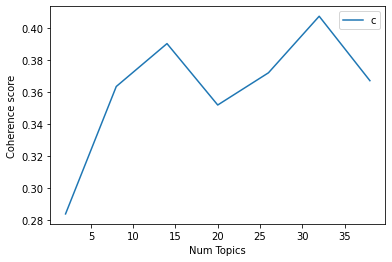

In [9]:
find_optimal_number_of_topics(dictionary, corpus, df)

In [11]:
NUM_TOPICS = 20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.012*"\'중도\'," + 0.009*"\'오토바이\'," + 0.009*"\'유적지\'," + 0.009*"\'유적\'," + 0.008*"\'랜드\'," + 0.007*"\'문화재\'," + 0.007*"\'발굴\'," + 0.007*"\'위험\'," + 0.006*"\'훼손\'," + 0.006*"\'국민\',"')
(1, '0.027*"\'게임\'," + 0.014*"\'청소년\'," + 0.013*"\'피해자\'," + 0.013*"\'요구\'," + 0.012*"\'아동\'," + 0.011*"\'착취\'," + 0.010*"\'처벌\'," + 0.009*"\'개인\'," + 0.009*"\'피해\'," + 0.009*"\'심의\',"')
(2, '0.017*"\'코로나\'," + 0.014*"\'국민\'," + 0.010*"\'통제\'," + 0.009*"\'동물\'," + 0.007*"\'나라\'," + 0.007*"\'우리\'," + 0.007*"\'일상\'," + 0.007*"\'검사\'," + 0.006*"\'건강\'," + 0.006*"\'있음\',"')
(3, '0.010*"\'사고\'," + 0.009*"\'국민\'," + 0.009*"\'사건\'," + 0.007*"\'국회의원\'," + 0.006*"\'임금\'," + 0.006*"\'수사\'," + 0.006*"\'세비\'," + 0.005*"\'사망\'," + 0.005*"\'군인\'," + 0.005*"\'최저\',"')
(4, '0.029*"\'불법\'," + 0.020*"\'사이트\'," + 0.017*"\'성범죄\'," + 0.015*"\'촬영\'," + 0.013*"\'처벌\'," + 0.010*"\'디지털\'," + 0.010*"\'피해\'," + 0.010*"\'피해자\'," + 0.009*"\'유포\'," + 0.007*"\'영상\',"')
(5, '0.017*"\'검찰\'," + 0.014*"\'헌법\'," + 0.013*"\'수사\'," + 0.0

In [25]:
import re


words = [re.findall('[가-힣]+',topic[1]) for topic in topics]
words = pd.DataFrame(words)
words = words.transpose()
words.to_csv("/content/drive/MyDrive/교류학술제/국회_topic.csv", encoding="ms949")

In [26]:
display(words)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,중도,게임,코로나,사고,불법,검찰,성범죄,투표,국적,교사,국민,아이,국가,코로나,특수,가족,동물,투표,여성,학교
1,오토바이,청소년,국민,국민,사이트,헌법,처벌,중국,가족,지방,국회,국민,국민,제한,소프트,국가,국민,선거,피해자,게임
2,유적지,피해자,통제,사건,성범죄,수사,범죄,국민,건강,희생자,범죄,여성,법률,자유,에어,여성,재난,개표,가족,교육
3,유적,요구,동물,국회의원,촬영,한약사,피해자,상담,수사,반란,헌법,국가,자유,국민,교육,국민,민사,사전,처벌,후보자
4,랜드,아동,나라,임금,처벌,의약품,징역,사전,개정안,국민,경찰,업무,사용,집회,학생,폐지,사항,전자,남성,게이
5,문화재,착취,우리,수사,디지털,판매,개정,낙태,가정,피해,시설,국적,제조,종교,사용,보안법,보호,부정,보호,규제
6,발굴,처벌,일상,세비,피해,한약,사건,대한민국,삭제,교육,발의,취득,발생,항공,안전,평등,관리,국민,매매,대안
7,위험,개인,검사,사망,피해자,조항,청소년,선거,탄핵,의료,국회의원,배송,보상,기본권,만들,게임,피해자,사용,청소년,토론회
8,훼손,피해,건강,군인,유포,국민,형량,우리,가해자,업무,특권,아내,음식물,금지,기준,부모,가해자,개표기,법률,셧다운제
9,국민,심의,있음,최저,영상,면허,아동,심리,한국,사건,동의,학교,처벌,명령,총포,안전,소송,선거법,폭력,이용


In [27]:

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [29]:
# 처음부터 22번까지의 문서에 대해서 가장 비율이 높은 topic 

for i, topic_list in enumerate(ldamodel[corpus]):
    if i==22:
        break
    print(i+1,'번째 문서의 topic 비율 :',topic_list)

1 번째 문서의 topic 비율 : [(12, 0.9972222)]
2 번째 문서의 topic 비율 : [(10, 0.99698406)]
3 번째 문서의 topic 비율 : [(16, 0.99737567)]
4 번째 문서의 topic 비율 : [(3, 0.9045342), (8, 0.06906409), (11, 0.02061938)]
5 번째 문서의 topic 비율 : [(12, 0.9626155), (14, 0.034518246)]
6 번째 문서의 topic 비율 : [(10, 0.9117891), (17, 0.08484005)]
7 번째 문서의 topic 비율 : [(14, 0.99618477)]
8 번째 문서의 topic 비율 : [(5, 0.99330986)]
9 번째 문서의 topic 비율 : [(16, 0.9931655)]
10 번째 문서의 topic 비율 : [(3, 0.07560482), (5, 0.010106125), (9, 0.02151288), (12, 0.09740169), (16, 0.6026575), (18, 0.17774248), (19, 0.013614612)]
11 번째 문서의 topic 비율 : [(6, 0.97847134), (17, 0.017598575)]
12 번째 문서의 topic 비율 : [(4, 0.9979392)]
13 번째 문서의 topic 비율 : [(0, 0.9971976)]
14 번째 문서의 topic 비율 : [(2, 0.99699366)]
15 번째 문서의 topic 비율 : [(2, 0.01738508), (3, 0.959148), (7, 0.021125358)]
16 번째 문서의 topic 비율 : [(13, 0.996289)]
17 번째 문서의 topic 비율 : [(0, 0.69087887), (10, 0.3048958)]
18 번째 문서의 topic 비율 : [(3, 0.9954762)]
19 번째 문서의 topic 비율 : [(10, 0.9970219)]
20 번째 문서의 topic 비율 : [

In [56]:
topic = []

for candidate in ldamodel[corpus]:
  candidate.sort(key=lambda x: -x[1])
  topic.append(candidate[0][0])

pd.DataFrame(topic).head(20)

,0
0,12
1,10
2,16
3,3
4,12
5,10
6,14
7,5
8,16
9,16


In [57]:
guk['topic'] = topic
display(guk)

,title,count,categ,start,text,topic
0,국가보안법 개정에 관한 청원,1761,수사/법무/사법제도,2021-06-16,"['최근', '국가', '보안법', '폐지', '올라오', '자유', '대한민국',...",12
1,인공지능 윤리 및 고인의 AI구현 법안 제정에 관한 청원,223,과학기술/정보통신,2021-06-15,"['동의', 'AI', '구현', '제재', '가하', '규정', '만들', '외의...",10
2,포괄적 차별금지법 법안 제정에 관한 동의 및 일부 내용 수정 요청에 관한 청원,14025,인권/성평등/노동,2021-06-15,"['UN', '사회권', '위원회', '국가', '인권', '위원회', '포괄적',...",16
3,국민연금 수급 개시 연령과 연계한 정년연장에 관한 청원,19807,인권/성평등/노동,2021-06-14,"['노동자', '정년', '기간', '국민', '연금', '수급', '개시', '연...",3
4,하수도법 일부개정법률안에 관한 청원,736,재난/안전/환경,2021-06-11,"['하수도', '특정', '공산품', '주방', '오물', '분쇄', '기은', '...",12
...,...,...,...,...,...,...
215,심리상담서비스법 제정에 관한 청원,226,복지/보훈,2021-07-07,"['최근', '한국', '심리', '학회', '상담', '심리', '학회', '임상...",7
216,온라인 플랫폼 중개거래의 공정화에 관한 법률안 제정에 관한 청원,169,소비자/공정거래,2021-06-25,"['출판계', '플랫폼', '막아주', '한국', '출판계', '미래', '소설',...",10
217,대체휴일에 관한 청원,161,행정/지방자치,2021-07-14,"['일요일', '공휴일', '대체', '휴일', '일괄적', '다음', '월요일',...",6
218,셧다운제 폐지를 위한 청소년 보호법 개정에 관한 청원,152,저출산/고령화/아동/청소년/가족,2021-07-07,"['순기능', '제대로', '역효과', '일으키', '셧다', '운제', '청소년'...",14


In [58]:
guk.to_csv('/content/drive/MyDrive/교류학술제/국회_topic붙은.csv', encoding ='ms949')